In [1]:
# Importing Libraries
import pandas as pd
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_excel(r"C:\Users\Monish Bangera\Desktop\BIA 658 FINAL\Multivariate_final_data_set.xlsx")

In [2]:
df=df.iloc[: , 0:] # Getting rid of unwanted columns

In [3]:
df.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,client_catg,region,creation_date,target
0,train_Client_100032,2017-02-24,11,393848,0,203,9,1,781,0,0,0,3844,4625,8,ELEC,11,308,2012-07-11 00:00:00,1
1,train_Client_100032,2016-06-21,11,393848,0,203,9,1,382,0,0,0,3462,3844,4,ELEC,11,308,2012-07-11 00:00:00,1
2,train_Client_100032,2018-10-26,11,393848,0,203,9,1,373,0,0,0,6032,6405,4,ELEC,11,308,2012-07-11 00:00:00,1
3,train_Client_100032,2018-06-21,11,393848,0,203,9,1,328,0,0,0,5704,6032,4,ELEC,11,308,2012-07-11 00:00:00,1
4,train_Client_100032,2018-02-23,11,393848,0,203,9,1,703,0,0,0,5001,5704,4,ELEC,11,308,2012-07-11 00:00:00,1


In [4]:
df.shape


(1465, 20)

In [5]:
df.columns

Index(['client_id', 'invoice_date', 'tarif_type', 'counter_number',
       'counter_statue', 'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'old_index',
       'new_index', 'months_number', 'counter_type', 'client_catg', 'region',
       'creation_date', 'target'],
      dtype='object')

In [6]:
df.isnull().values.any() # We dont have any nulls

False

In [7]:
df['target'].value_counts()     # The dataset is balanced

1    779
0    686
Name: target, dtype: int64

In [8]:
df.apply(lambda col: len(col.unique())) # No of unique features in each column

client_id                 40
invoice_date             860
tarif_type                 6
counter_number            71
counter_statue             4
counter_code               9
reading_remarque           3
counter_coefficient        1
consommation_level_1     678
consommation_level_2     109
consommation_level_3      50
consommation_level_4      22
old_index               1286
new_index               1319
months_number             11
counter_type               2
client_catg                3
region                    19
creation_date             40
target                     2
dtype: int64

In [9]:
# Drop unwanted columns
df.drop(columns=['client_id','invoice_date','old_index','new_index','creation_date','counter_number'],axis=1,inplace=True)
# in our case, ['tarif_type', 'counter_statue', 'reading_remarque  ', 'counter_coefficient', 'counter_type ', 'client_catg', 'region '] are dummy variables

In [10]:
# Change datatype of columns
df.__dict__.update(df.astype({'tarif_type': 'object','counter_statue':'object','reading_remarque':'object','counter_type':'object','client_catg':'object','region':'object','counter_coefficient':'object'}).__dict__)

In [11]:
categorical_variable=[feature for feature in df.columns if df[feature].dtype=='O'] # Categorical Features

In [12]:
categorical_variable 

['tarif_type',
 'counter_statue',
 'reading_remarque',
 'counter_coefficient',
 'counter_type',
 'client_catg',
 'region']

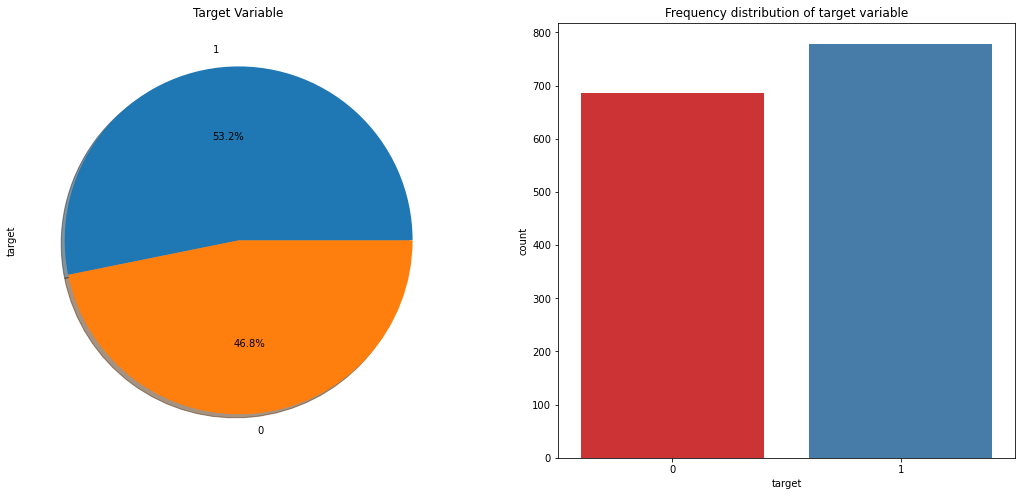

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8)) # Visualizing the target column

ax[0] = df['target'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Target Variable')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="target", data=df, palette="Set1")
ax[1].set_title("Frequency distribution of target variable")

plt.show()

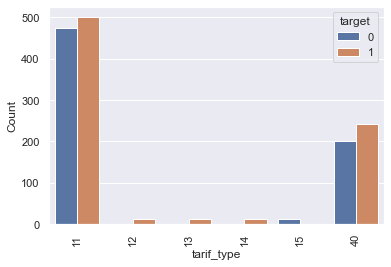

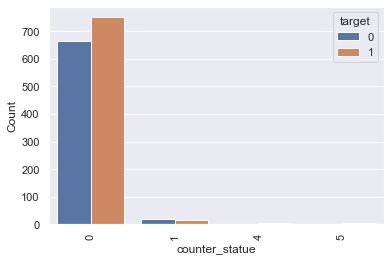

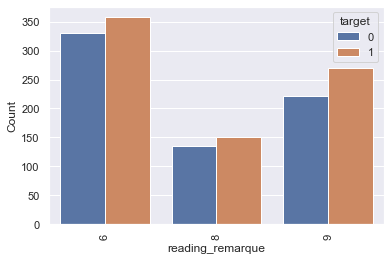

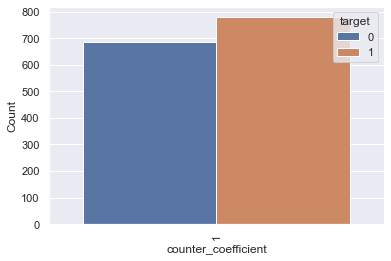

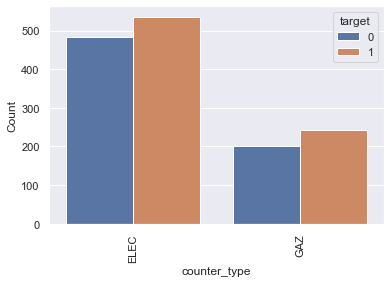

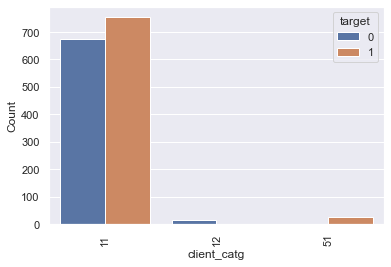

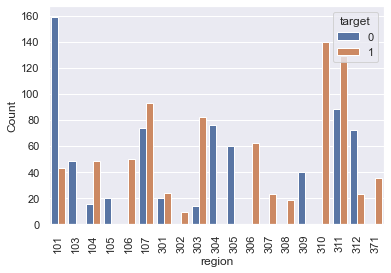

In [14]:
sns.set_theme(style="darkgrid") # Data Visualization
for feature in categorical_variable:
    data=df.copy()
    sns.countplot(x=feature, hue='target',data=df)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()
    

In [15]:
# Numerical features
numeric_feature=[feature for feature in df.columns if feature not in categorical_variable and feature!='target']

In [16]:
numeric_feature

['counter_code',
 'consommation_level_1',
 'consommation_level_2',
 'consommation_level_3',
 'consommation_level_4',
 'months_number']

In [17]:
# Discrete Features
dis_feature=[feature for feature in numeric_feature if len(df[feature].unique())<=25 ]

In [18]:
# Continuous features 
cont_features=[feature for feature in numeric_feature if feature not in dis_feature]

In [19]:
cont_features

['consommation_level_1', 'consommation_level_2', 'consommation_level_3']

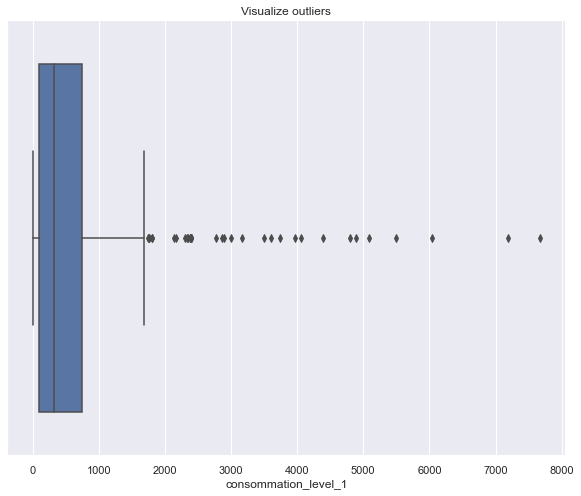

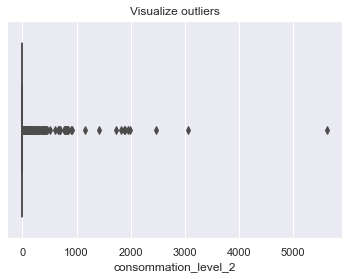

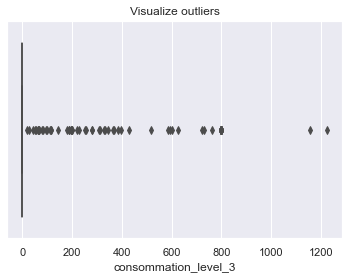

In [20]:
# Checking for outlier
f, ax = plt.subplots(figsize=(10,8))
for i in cont_features:
    
    ax = sns.boxplot(x=df[i])
    plt.xlabel(i)
    ax.set_title("Visualize outliers")
    plt.show()

In [21]:
dis_feature

['counter_code', 'consommation_level_4', 'months_number']

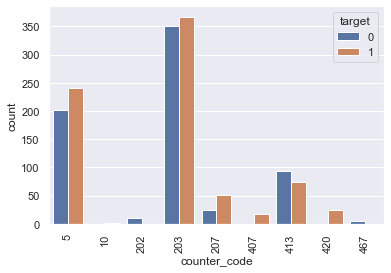

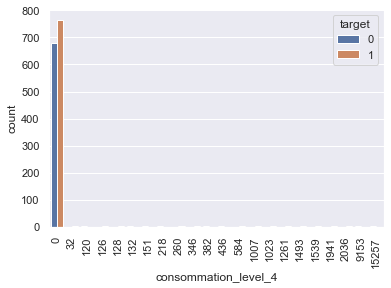

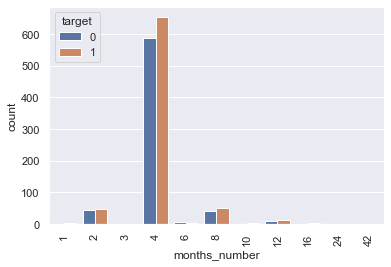

In [22]:
# Visualizing Discrete features
for feature in dis_feature:
    d=df.copy()
    sns.countplot(x=feature, hue="target", data=df)
    plt.xticks(rotation=90)
    plt.xlabel(feature)
    plt.show()

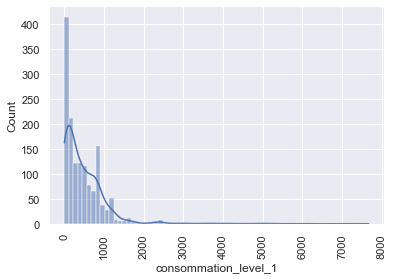

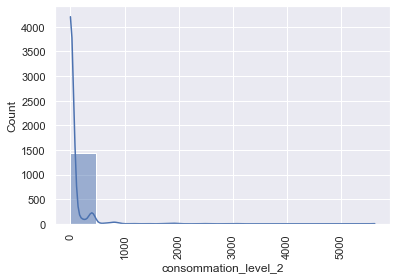

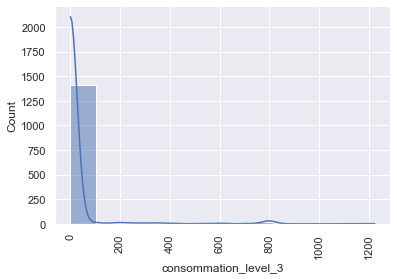

In [23]:
# Visualizing continuous features
for feature in cont_features:
    d=df.copy()
    sns.histplot(x=feature, data=df,kde=True)
    plt.xticks(rotation=90)
    plt.xlabel(feature)
    plt.show()

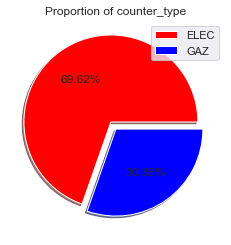

In [24]:
# PIE chart for counter_type
sizes_gender = df['counter_type'].value_counts()    
plt.pie(sizes_gender.tolist(),autopct='%1.2f%%',explode=[0.1,0],shadow=True, colors=['red', 'blue'])
plt.legend(sizes_gender.index.values)
plt.title('Proportion of counter_type')
plt.show()

In [25]:
categorical_variable

['tarif_type',
 'counter_statue',
 'reading_remarque',
 'counter_coefficient',
 'counter_type',
 'client_catg',
 'region']

In [26]:
# Creating Dummies
col = ['tarif_type', 'counter_statue', 'reading_remarque', 'counter_coefficient', 'counter_type', 'client_catg', 'region']
df2 = pd.get_dummies(df, columns = col, drop_first=True)
df2.head()
df2.shape

(1465, 38)

In [27]:
# Checking for correlated features
import statsmodels.api as sm

corr_matrix = sm.add_constant((df2.drop('target', axis = 1))).corr()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if (corr_matrix.iloc[i, j] >= 0.95) and i != j:
            print(f"{corr_matrix.columns[i]} and {corr_matrix.index[j]} have a correlation of {corr_matrix.iloc[i, j]}" ) 

counter_type_GAZ and tarif_type_40 have a correlation of 1.0


In [28]:
# Dropping correlated feature
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

y = df2['target']
x = df2.drop(['target', 'tarif_type_40'], axis = 1)


In [29]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [30]:
# Feature Scaling 
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

In [31]:
# Conduction principal component analysis
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.8)
pca.fit(x_train_s)
print('Variance ratio of each pc:\n', pca.explained_variance_ratio_, '\n')
print('Explained variance of each pc:\n', pca.explained_variance_, '\n')
print('Selected {} pcs'.format(pca.n_components_))
print('Original dataset shape: ', df2.shape)

Variance ratio of each pc:
 [0.0798757  0.06139005 0.04763516 0.04291263 0.04084791 0.04027551
 0.03704896 0.03645852 0.03571057 0.03356753 0.03125733 0.03084153
 0.03064608 0.02964871 0.02932775 0.02901348 0.02894788 0.02880751
 0.02816276 0.02808391 0.02723034 0.02671476] 

Explained variance of each pc:
 [2.87798092 2.21192922 1.71633023 1.54617409 1.47178066 1.45115653
 1.33490156 1.31362769 1.28667829 1.20946322 1.12622494 1.11124334
 1.10420101 1.06826521 1.05670049 1.04537739 1.04301361 1.03795605
 1.01472532 1.01188399 0.98112932 0.96255253] 

Selected 22 pcs
Original dataset shape:  (1465, 38)


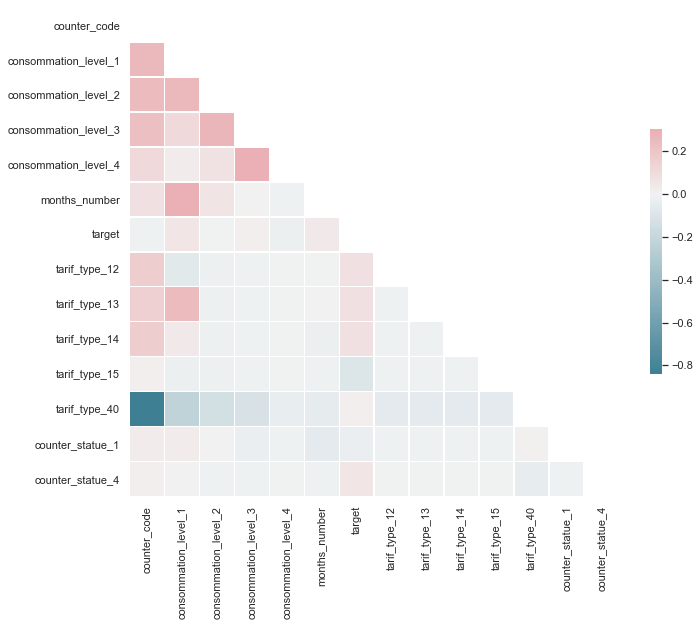

In [32]:
import numpy as np
sns.set(style = 'whitegrid')

corr = df2.iloc[:, :14].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)


sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show();

In [33]:
# Logistic Regression Model
x_train_pca = pca.transform(x_train_s)
x_test_pca = pca.transform(x_test_s)

lg = LogisticRegression(C = 1000, solver = 'lbfgs', max_iter = 1000)
lg.fit(x_train_pca, y_train)

predict = lg.predict(x_test_pca)

In [34]:
y_predict_test = lg.predict(x_test_pca)

In [35]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, plot_roc_curve, precision_score, recall_score
print("Logistic Regression Model")
print('Precision Score: ', round(precision_score(y_test,y_predict_test), 2)*100)
print('Recall Score: ', round(recall_score(y_test,y_predict_test), 2)*100)
print('F1 Score: ', round(f1_score(y_test, y_predict_test), 2)*100)
print('Accuracy Score: ', round(accuracy_score(y_test, y_predict_test), 2)*100)
print('ROC AUC: ', round(roc_auc_score(y_test,y_predict_test), 2)*100)
print('classification report:\n', classification_report(y_test, y_predict_test))

Logistic Regression Model
Precision Score:  84.0
Recall Score:  89.0
F1 Score:  86.0
Accuracy Score:  85.0
ROC AUC:  85.0
classification report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83       135
           1       0.84      0.89      0.86       158

    accuracy                           0.85       293
   macro avg       0.85      0.85      0.85       293
weighted avg       0.85      0.85      0.85       293



In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

pipeline = Pipeline([
    ('standardization', preprocessing.StandardScaler()),
    ('pca', PCA()),    
    ('lg', LogisticRegression(solver ='lbfgs', max_iter = 1000))])
param_grid = {
  'lg__C': [1000, 100, 10, 1, 0.1, 0.01],
  'pca__n_components':  [10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
}
# using cross validation we get grid
grid = GridSearchCV(pipeline, cv = 3, param_grid = param_grid, scoring = 'roc_auc', refit=True, verbose=1)
grid_fit = grid.fit(x_train, y_train)
pipeline.get_params().keys()

Fitting 3 folds for each of 126 candidates, totalling 378 fits


C:\Users\Monish Bangera\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Monish Bangera\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

dict_keys(['memory', 'steps', 'verbose', 'standardization', 'pca', 'lg', 'standardization__copy', 'standardization__with_mean', 'standardization__with_std', 'pca__copy', 'pca__iterated_power', 'pca__n_components', 'pca__random_state', 'pca__svd_solver', 'pca__tol', 'pca__whiten', 'lg__C', 'lg__class_weight', 'lg__dual', 'lg__fit_intercept', 'lg__intercept_scaling', 'lg__l1_ratio', 'lg__max_iter', 'lg__multi_class', 'lg__n_jobs', 'lg__penalty', 'lg__random_state', 'lg__solver', 'lg__tol', 'lg__verbose', 'lg__warm_start'])

In [37]:
y_grid_p=grid.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, plot_roc_curve, precision_score, recall_score
print("Logistic Regression Model with best parameters")
print('Precision Score: ', round(precision_score(y_test,y_grid_p), 2)*100)
print('Recall Score: ', round(recall_score(y_test,y_grid_p), 2)*100)
print('F1 Score: ', round(f1_score(y_test, y_grid_p), 2)*100)
print('Accuracy Score: ', round(accuracy_score(y_test, y_grid_p), 2)*100)
print('ROC AUC: ', round(roc_auc_score(y_test,y_grid_p), 2)*100)
print('classification report:\n', classification_report(y_test, y_grid_p))

Logistic Regression Model with best parameters
Precision Score:  84.0
Recall Score:  89.0
F1 Score:  87.0
Accuracy Score:  85.0
ROC AUC:  85.0
classification report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83       135
           1       0.84      0.89      0.87       158

    accuracy                           0.85       293
   macro avg       0.85      0.85      0.85       293
weighted avg       0.85      0.85      0.85       293



In [39]:
# Decision Tree Classifier
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train_pca, y_train)

In [40]:
y_pred=clf.predict(x_test_pca)

In [41]:
print("Decision Tree  Model")
print('Precision Score: ', round(precision_score(y_test,y_pred), 2)*100)
print('Recall Score: ', round(recall_score(y_test,y_pred), 2)*100)
print('F1 Score: ', round(f1_score(y_test, y_pred), 2)*100)
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred), 2)*100)
print('ROC AUC: ', round(roc_auc_score(y_test,y_pred), 2)*100)
print('classification report:\n', classification_report(y_test, y_pred))

Decision Tree  Model
Precision Score:  89.0
Recall Score:  91.0
F1 Score:  90.0
Accuracy Score:  89.0
ROC AUC:  89.0
classification report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       135
           1       0.89      0.91      0.90       158

    accuracy                           0.89       293
   macro avg       0.89      0.89      0.89       293
weighted avg       0.89      0.89      0.89       293



In [42]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [43]:
grid_search = GridSearchCV(estimator=clf, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [44]:
grid_search.fit(x_train_pca, y_train)
pipeline.get_params().keys()

Fitting 4 folds for each of 50 candidates, totalling 200 fits


dict_keys(['memory', 'steps', 'verbose', 'standardization', 'pca', 'lg', 'standardization__copy', 'standardization__with_mean', 'standardization__with_std', 'pca__copy', 'pca__iterated_power', 'pca__n_components', 'pca__random_state', 'pca__svd_solver', 'pca__tol', 'pca__whiten', 'lg__C', 'lg__class_weight', 'lg__dual', 'lg__fit_intercept', 'lg__intercept_scaling', 'lg__l1_ratio', 'lg__max_iter', 'lg__multi_class', 'lg__n_jobs', 'lg__penalty', 'lg__random_state', 'lg__solver', 'lg__tol', 'lg__verbose', 'lg__warm_start'])

In [45]:
y_pred=grid_search.predict(x_test_pca)

In [46]:
print("Decision Tree Model with best parameters")
print('Precision Score: ', round(precision_score(y_test,y_pred), 2)*100)
print('Recall Score: ', round(recall_score(y_test,y_pred), 2)*100)
print('F1 Score: ', round(f1_score(y_test, y_pred), 2)*100)
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred), 2)*100)
print('ROC AUC: ', round(roc_auc_score(y_test,y_pred), 2)*100)
print('classification report:\n', classification_report(y_test, y_pred))

Decision Tree Model with best parameters
Precision Score:  87.0
Recall Score:  89.0
F1 Score:  88.0
Accuracy Score:  87.0
ROC AUC:  87.0
classification report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       135
           1       0.87      0.89      0.88       158

    accuracy                           0.87       293
   macro avg       0.87      0.87      0.87       293
weighted avg       0.87      0.87      0.87       293



In [47]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)





clf.fit(x_train_pca, y_train)



y_pred = clf.predict(x_test_pca)





print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)*100))

Model accuracy score with doors variable removed : 90.4437


In [48]:
print("Random Forest Model ")
print('Precision Score: ', round(precision_score(y_test,y_pred), 2)*100)
print('Recall Score: ', round(recall_score(y_test,y_pred), 2)*100)
print('F1 Score: ', round(f1_score(y_test, y_pred), 2)*100)
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred), 2)*100)
print('ROC AUC: ', round(roc_auc_score(y_test,y_pred), 2)*100)
print('classification report:\n', classification_report(y_test, y_pred))

Random Forest Model 
Precision Score:  90.0
Recall Score:  92.0
F1 Score:  91.0
Accuracy Score:  90.0
ROC AUC:  90.0
classification report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       135
           1       0.90      0.92      0.91       158

    accuracy                           0.90       293
   macro avg       0.90      0.90      0.90       293
weighted avg       0.90      0.90      0.90       293



In [49]:
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

clf = GridSearchCV(clf, forest_params, cv = 3, scoring='roc_auc')

clf.fit(x_train_pca, y_train)

print(clf.best_params_)

print(clf.best_score_)

C:\Users\Monish Bangera\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Monish Bangera\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Monish Bangera\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Monish Bangera\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Monish Bangera\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Monish Bangera\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
 

{'max_depth': 11, 'max_features': 6}
0.9713519339166247


In [50]:
y_pred=clf.predict(x_test_pca)

In [51]:
print("Random Forest Model with best parameters")
print('Precision Score: ', round(precision_score(y_test,y_pred), 2)*100)
print('Recall Score: ', round(recall_score(y_test,y_pred), 2)*100)
print('F1 Score: ', round(f1_score(y_test, y_pred), 2)*100)
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred), 2)*100)
print('ROC AUC: ', round(roc_auc_score(y_test,y_pred), 2)*100)
print('classification report:\n', classification_report(y_test, y_pred))

Random Forest Model with best parameters
Precision Score:  92.0
Recall Score:  92.0
F1 Score:  92.0
Accuracy Score:  91.0
ROC AUC:  91.0
classification report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       135
           1       0.92      0.92      0.92       158

    accuracy                           0.91       293
   macro avg       0.91      0.91      0.91       293
weighted avg       0.91      0.91      0.91       293

